<a href="https://colab.research.google.com/github/harshaanth/Telco_Customer_Churn_Prediction/blob/main/DS_Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case 1: Telco Customer Churn
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets](
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

### Import the data
The URL is a Google Drive link set to allow anyone with the link to view. This is a useful block of code to keep nearby. The only piece that changes is the value of the "orig_url".

In [ ]:
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/18e7X8-KyzlX6K1P8sujnVDVtERgsWD9P/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
telco = pd.read_csv(csv_raw)
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Import libraries

In [ ]:
import numpy as np # array operations
import pandas as pd # data processing
import matplotlib.pyplot as plt # visuals
import seaborn as sns # visuals
import warnings
warnings.filterwarnings("ignore") # suppress warnings for readability

### 1. Data Exploration

#### 1.a. Determine the shape of the data.

In [ ]:
# find the shape of the telco data set.
telco.shape

(3333, 21)

#### 1.b. What do the numbers ```(3333, 21)``` tell you?
There are 3333 rows and 21 columns in the data set.

#### 1.c. Deterimine whether or not there are any missing values.

In [ ]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

#### 1.d. Determine the count of each of the Churn  (target variable) categories ('yes', 'no'). Use the ```value_counts()``` method.

In [ ]:
# separate churn
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

#### 1.e. Create a histogram of the 'Account_Length'. Use the Seaborn distplot method.

<Axes: xlabel='Account_Length', ylabel='Density'>

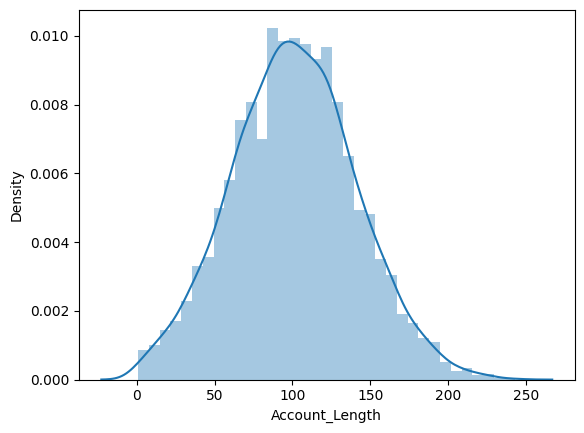

In [ ]:
import matplotlib as plt
import seaborn as sns
sns.distplot(telco['Account_Length'])

#### 1.f. Create a boxplot of the Account_Length by Churn status.

<Axes: xlabel='Churn', ylabel='Account_Length'>

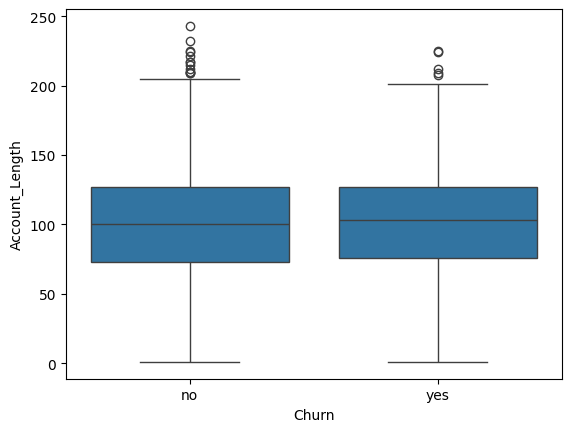

In [ ]:
sns.boxplot(x='Churn', y='Account_Length', data=telco)

### 1.g. Describe any patterns in Churn based on tenure.
The patterns in account length don't differ based on churn status.














### 2. Data Preprocessing

#### 2.a. Determine the data types for all of the variables in the telco data set. Use the `dtypes` attribute.

In [ ]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

#### 2.b. Based on the results above, which 5 variables require modification before a model can be built from this data set?
```
Churn              object
Intl_Plan          object
Vmail_Plan         object
State              object
Phone              object
```

What do the ```Churn``` values look like?

In [ ]:
telco['Churn'].head()

0    no
1    no
2    no
3    no
4    no
Name: Churn, dtype: object

Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1.

In [ ]:
telco['Churn']=telco['Churn'].replace({'no':0, 'yes':1})
telco['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

What do the ```'Intl_Plan'``` values look like?

In [ ]:
telco['Intl_Plan'].head()

0     no
1     no
2     no
3    yes
4    yes
Name: Intl_Plan, dtype: object

Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1.

In [ ]:
telco['Intl_Plan']=telco['Intl_Plan'].replace({'no':0, 'yes':1})
telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

#### 2.c. What do the ```'Vmail_Plan'``` values look like?

In [ ]:
telco['Vmail_Plan'].head()

0    yes
1    yes
2     no
3     no
4     no
Name: Vmail_Plan, dtype: object

#### 2.d. Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1 for the ```'Vmail_Plan'``` data.

In [ ]:
telco['Vmail_Plan']=telco['Vmail_Plan'].replace({'no':0, 'yes':1})
telco['Vmail_Plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64

Re-examine the data types of the telco data.

In [ ]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

What do the ```'State'``` values look like?

In [ ]:
telco['State'].head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

Use the Pandas ```get_dummies``` method to create a column of indicators for each state.

In [ ]:
telco=pd.get_dummies(data=telco, columns=['State'], drop_first=True)
telco

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,...,0,0,0,0,0,0,0,0,0,0
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,...,0,0,0,0,0,0,0,0,1,0
3330,28,0,180.8,288.8,191.9,14.1,2,no,no,no,...,0,0,0,0,0,0,0,0,0,0
3331,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,...,0,0,0,0,0,0,0,0,0,0


#### 2.e. Remove the `Phone` variable from the telco data. Use the Pandas `drop()` method.

In [ ]:
# drop customer id
telco.drop(['Phone'], axis=1, inplace=True)


Examine the first few rows of the data set.

In [ ]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
telco.info()

### 3. Attribute Selection (abbreviated)

Find the correlations for the quantitative variables.

In [ ]:
corr=telco[['Account_Length','Vmail_Message','Day_Mins','Eve_Mins','Night_Mins','Intl_Mins','CustServ_Calls','Day_Calls','Day_Charge','Eve_Calls','Eve_Charge','Night_Calls','Night_Charge','Intl_Calls','Intl_Charge']].corr()
corr

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674


#### 3.a. Create a heatmap of the correlations using the Seaborn `heatmap()` method.

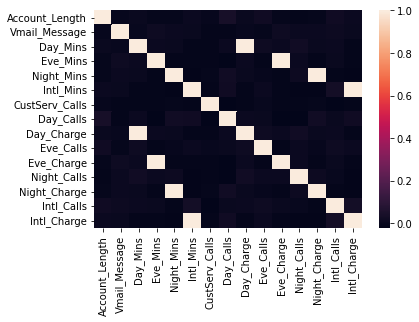

In [ ]:
import seaborn as sns
sns.heatmap(corr)

#### 3.b. Based on the correlation analysis, which variables appear to be the most closely associated?
```
Day_Charge and Day_Mins
Eve_Charge and Eve_Mins
Night_Charge and Night_Mins
Intl_Charge and Intl_Mins
```

#### 3.c. What could be done to eliminate redundancy in the data?

Delete
```
Day_Charge
Eve_Charge
Night_Charge
Intl_Charge
```
or delete
```
Day_Mins
Eve_Mins
Night_Mins
Intl_Mins
```
from the data set to avoid multicollinearity -- this is the term to describe the case when some of the feature variable are correlated with each other. This must be avoided in order to ensure that only unique information is provided to the predictive model.

### 4. Building the Model

Separate the collection of feature variables from the target variable.

#### 4.a. Use the Pandas `drop()` method to remove the `Churn` data from the telco data set and store the results as `features`.

In [ ]:
features=telco.drop(['Churn'], axis=1)

#### 4.b. Store the telco Churn data as `target`.

In [ ]:
target=telco['Churn']

#### 4.c. Create the four data sets `X_train, X_test, y_train, y_test` using the `train_test_split` method from `sklearn`.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
X_train.head()

In [ ]:
y_train.head()

#### 4.d. Build a Logistic regression model by fitting this model to the X and y training data.

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(X_train, y_train)

LogisticRegression()

#### 4.e. Use the classifier to predict the target values based on the X testing data.

In [ ]:
# Make predictions using the collection of featuress reserved in X_test
clf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### 5. Model Evaluation

#### 5.a. Use the `score()` method to determine the model's accuracy.

In [ ]:
clf_score=clf.score(X_test, y_test)
print(clf_score)

0.8515742128935532


#### 5.b. Briefly interpret the score of this classifier.
The score measures the accuracy of the model in terms of its ability to correctly predict customer churn.
```
Accuracy   
Total Number of Correct Predictions / Total Number of Data Points
```
About 85% of the customers were correctly identified as likely to churn when the model was applied to the test data.